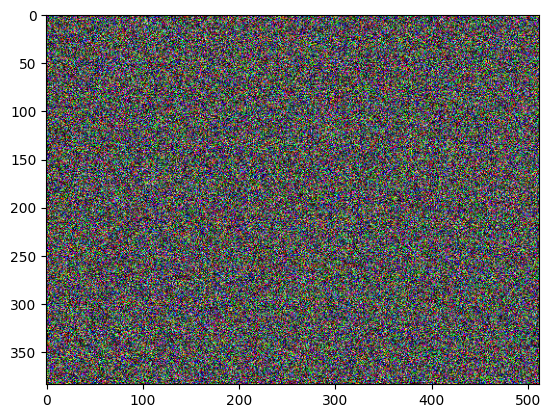

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

width = 512
height = 384
im = np.random.random(size = (height, width, 3))
im = im*im # this is an approximate gamma correction because imshow expects non-linear intensities
plt.imshow(im)
plt.show()

## Program 1

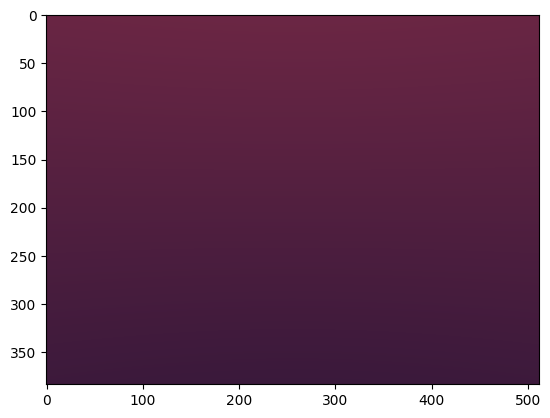

In [3]:
def vec3(x, y, z):
    # Just a shortcut to the np.array function
    # - vec3 creates an np.array of 3-dimensions
    return np.array( (x, y, z) )

def unit_vector(v):
    # This function takes an argument of type np.array
    # then it normalizes it... and returns it.
    len = math.sqrt(np.dot(v,v))
    return v / len

def background_color(v):
    # We use the second index of the input-vector,
    # as this is the height dimension mimicking the height,
    # coming from an elevated source.
    u = 0.5*(1.0 + v[1])
    
    # We think the first vector changes the background colour,
    # the second changes the color of the light
    return u*vec3(0.6, 0.2, 0.3) + (1.0-u)*vec3(0.05, 0.05, 0.2)

ray_origin = vec3(0, 0, 0)

# both are scalars
# height = H (or n_y as per the book)
# width = W (or n_x as per the book),
aspect = height/width

# we hypothesise this is the d-value
window_depth = 2.0

# This makes sense for the values l = -1, r = 1, b = -1, r = 1
# (see Orthographic views 4.3.1 in the book, fourth edition)
l = -1; r = 1
b = -1; t = 1

for row in range(height):
    for column in range(width):
        u = l + (r - l)*(column + 0.5) / width
        v = b + (t - b)*(row + 0.5) / height
        
        # TODO: Ask a TA why the aspect-ratio is a multiplied by v
        ray_direction = unit_vector(vec3(u, aspect*v, -window_depth))
        
        # indexing here indicates that (0,0) is at the bottom left corner as in
        # a cartesian coordinate system.
        im[height-row-1, column, :] = background_color( ray_direction )

plt.imshow(im)
plt.show()

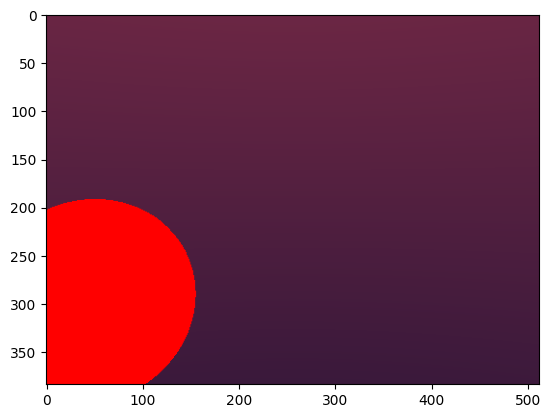

In [8]:
# We here define an upper bound that we will use to
# ignore rays who do not connect with the sphere
upper_bound = 1.0e9

def hit_sphere(ray_origin, ray_direction, center, radius):
    # some small constant, to try and handle small numerical
    # values
    small_constant = 1.0e-5
    
    # I have renamed "oc" to "pc" here, to keep in line with
    # the notation of the book.
    # The book refers to this as the "implicit_equation", so as will I.
    # (this can be found in the book at Ray-Sphere intersection 4.4.1, fourth edition)
    pc = ray_origin - center
    implicit_equation = np.dot(pc, pc) - radius*radius
    
    # (ray_origin - center) . ray_direction (ray_direction is denoted as bold "d" in the book)
    # qb = (p - c) . d
    qb = np.dot(pc, ray_direction)
    
    discriminant = qb*qb - implicit_equation
    
    if (discriminant > 0):
        t = (-qb - math.sqrt(discriminant))
        
        if t > small_constant:
            return t
        
        t = (-qb + math.sqrt(discriminant))
        if t > small_constant:
            return t
    
    return upper_bound


center = vec3(-2, -1, -5)
radius = 1


# This makes sense for the values l = -1, r = 1, b = -1, r = 1
# (see Orthographic views 4.3.1 in the book, fourth edition)
l = -1; r = 1
b = -1; t = 1

# print(f"b:{b}\nl:{-1}\nr:{r}\nt:{t}")
for row in range(height):
    for column in range(width):
        u = l + (r - l)*(column + 0.5) / width
        v = b + (t - b)*(row + 0.5) / height
        
        # TODO: Ask a TA why the aspect-ratio is a multiplied by v
        ray_direction = unit_vector(vec3(u, aspect*v, -window_depth))
        hit = hit_sphere(ray_origin, ray_direction, center, radius)
        
        # indexing here indicates that (0,0) is at the bottom left corner as in
        # a cartesian coordinate system.
        # Here we check whether the ray actually connected with the sphere,
        # by seeing whether its value is less than the upper bound. 
        if (hit < upper_bound):
            im[height - row - 1, column, :] = vec3(1, 0, 0)
        else:
            im[height - row - 1, column, :] = background_color( ray_direction )

plt.imshow(im)
plt.show()



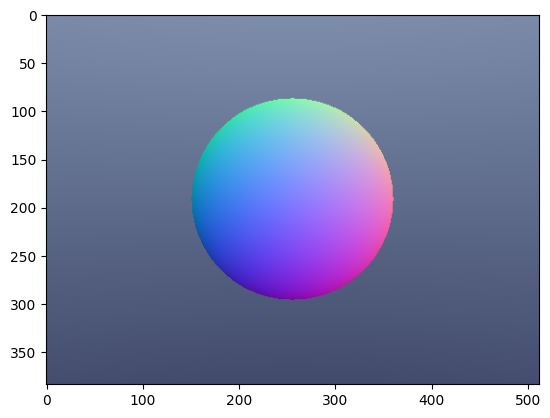

In [20]:
def pseudocolor(v):
    return 0.5*(vec3(1, 1, 1) + v)

for row in range(height):
    for column in range(width):
        u = (column + 0.5) / width
        v = (row + 0.5) / height
        ray_direction = unit_vector(vec3(2.0*u-1.0, aspect*(2.0*v-1.0), -window_depth))
        t = hit_sphere(ray_origin, ray_direction, center, radius)
        hit_point = ray_origin + t * ray_direction
        surface_normal = (1/radius) * (hit_point - center)
        if (t < 1.0e8):
            im[height-row-1, column, :] = pseudocolor(surface_normal)
        else:
            im[height - row - 1, column, :] = background_color( ray_direction )




plt.imshow(im)
plt.show()

In [15]:
def hit_array(ray_origin, ray_direction, centers, radii):
    t_min = 9.0e8
    t_min = -1
    hit_something = False
    for i in range(len(centers)):
        t = hit_sphere(ray_origin, ray_direction, centers[i], radii[i])
        if (t >= 0.0001 and t < t_min):
            t_min = t
            i_min = i
            hit_something = True
            
    return (hit_something, t_min, i_min)